<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import pandas as pd
import biom

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

data_dir = '../sfari/data/mbqc'
md = pd.read_csv('../sfari/data/mbqc/SraRunTable.txt', index_col=0)

First, let's visualize all of the fecal samples in the MBQC, so that we can cherry pick some samples with really bad batch effects.

In [2]:
data_dir = '../sfari/data/mbqc/'
table = biom.load_table(f'{data_dir}/deblur/all.wol.biom')

# focus on stool samples
md = md.loc[md['env_material'] == 'Stool']  # focus on stool
# drop irrelevant features and samples
filter_f = lambda v, i, m: i in md.index
table.filter(filter_f, axis='sample')
md = md.loc[table.ids()]
md['Contributor_name'] = md['Contributor (exp)'].apply(lambda x: x.split('-')[0])

In [3]:
from skbio.stats.ordination import pcoa
from skbio.diversity import beta_diversity

tab = table.to_dataframe().T
ids = list(tab.index)
otu_ids = list(tab.columns)
dm = beta_diversity("braycurtis", tab.values, tab.index)
res = pcoa(dm)

/mnt/home/jmorton/miniconda3/envs/qiime2-2021.4/lib/python3.8/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -2.755431211036843 and the largest is 91.74860807881024.
  warn(


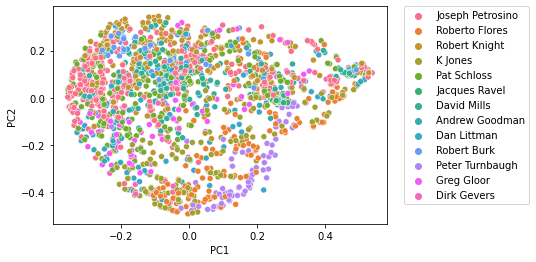

In [4]:
rmd = pd.concat((res.samples, md), axis=1)
sns.scatterplot(data=rmd, x='PC1', y='PC2', hue='Contributor_name')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

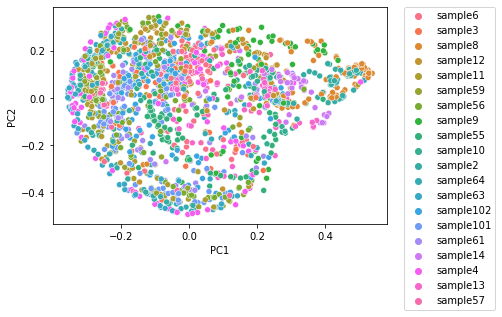

In [5]:
sns.scatterplot(data=rmd, x='PC1', y='PC2', hue='Sample Name')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [6]:
rmd = pd.concat((res.samples, md), axis=1)
select_contributors = ['Pat Schloss', 'Robert Knight', 'Peter Turnbaugh', 'Roberto Flores']
rmd = rmd.loc[rmd['Contributor_name'].apply(lambda x: x in select_contributors)]

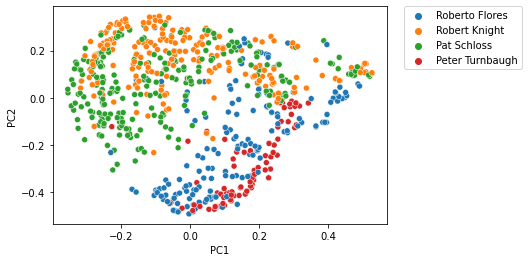

In [7]:
sns.scatterplot(data=rmd, x='PC1', y='PC2', hue='Contributor_name')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

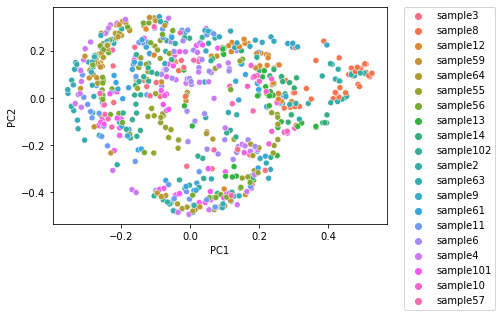

In [8]:
sns.scatterplot(data=rmd, x='PC1', y='PC2', hue='Sample Name')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

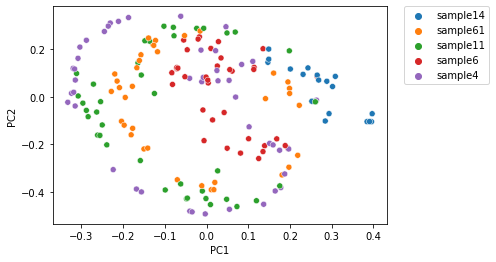

In [9]:
sample_names = ['sample11', 'sample14', 'sample61', 'sample4', 'sample6']
rmd2 = rmd.loc[rmd['Sample Name'].apply(lambda x: x in sample_names)]
sns.scatterplot(data=rmd2, x='PC1', y='PC2', hue='Sample Name')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Sample 4 and sample 6 look like good candidates, let's cherry pick them.

In [10]:
sample_names = ['sample4', 'sample6']
md = md.rename(columns={'Contributor (exp)': 'Contributor', 'Sample Name': 'Sample_Name'})
idx = md.apply(lambda x: x['Sample_Name'] in sample_names, axis=1)
submd = md.loc[idx]
submd.to_csv(f'{data_dir}/metadata/sample_4_6_metadata.txt', sep='\t')

In [11]:
first_md = submd.reset_index().groupby(['Sample_Name', 'Contributor']).first()
last_md = submd.reset_index().groupby(['Sample_Name', 'Contributor']).last()

first_md = first_md.reset_index().set_index('Run')
last_md = last_md.reset_index().set_index('Run')

first_md.index.name = 'sampleid'
last_md.index.name = 'sampleid'

first_md.to_csv(f'{data_dir}/metadata/sample_4_6_metadata_first.txt', sep='\t')
last_md.to_csv(f'{data_dir}/metadata/sample_4_6_metadata_last.txt', sep='\t')

Save metadata for each contributor

In [12]:
for i, contr in enumerate(select_contributors):
    smd = submd.loc[submd['Contributor_name'] == contr]
    smd.index.name = 'sampleid'
    name = contr.split(' ')[-1].lower()
    smd.to_csv(f'{data_dir}/metadata/{name}', sep='\t')

Let's now look at Sample 14 and Sample 61

In [13]:
sample_names = ['sample14', 'sample61']
md = md.rename(columns={'Contributor (exp)': 'Contributor', 'Sample Name': 'Sample_Name'})
idx = md.apply(lambda x: x['Sample_Name'] in sample_names, axis=1)
submd = md.loc[idx]
submd.to_csv(f'{data_dir}/metadata/sample_14_61_metadata.txt', sep='\t')

In [14]:
first_md = submd.reset_index().groupby(['Sample_Name', 'Contributor']).first()
last_md = submd.reset_index().groupby(['Sample_Name', 'Contributor']).last()

first_md = first_md.reset_index().set_index('Run')
last_md = last_md.reset_index().set_index('Run')

first_md.index.name = 'sampleid'
last_md.index.name = 'sampleid'

first_md.to_csv(f'{data_dir}/metadata/sample_14_61_metadata_first.txt', sep='\t')
last_md.to_csv(f'{data_dir}/metadata/sample_14_61_metadata_last.txt', sep='\t')

for i, contr in enumerate(select_contributors):
    smd = submd.loc[submd['Contributor_name'] == contr]
    smd.index.name = 'sampleid'
    name = contr.split(' ')[-1].lower()
    smd.to_csv(f'{data_dir}/metadata/{name}', sep='\t')

In [20]:
len(md.groupby(['Contributor_name', 'Sample_Name']))

250